In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.optimize
import random
import decimal
import warnings
warnings.simplefilter('ignore')

## I. Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision 𝜀 = 0.001) 𝑥: 𝑓(𝑥) → 𝑚𝑖𝑛 for the functions.

In [2]:
def cubic_function(x):
    return x ** 3

def abs_function(x):
    return abs(x - 0.2)

def sin_function(x):
    return x * np.sin(1/x)

In [3]:
e = 0.001

cubic_range = np.arange(0, 1+e, e)
abs_range = np.arange(0, 1+e, e)
sin_range = np.arange(0.01, 1+e, e)

In [4]:
def plot(x, y, label):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y)
    plt.title(label, fontsize=20)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('f(x)', fontsize=16)
    plt.grid()
    plt.savefig(f'{label}.png', dpi=300)

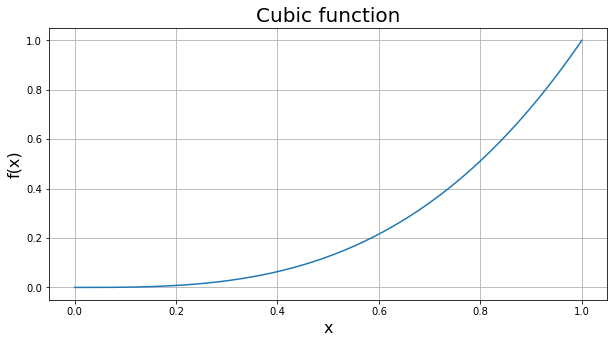

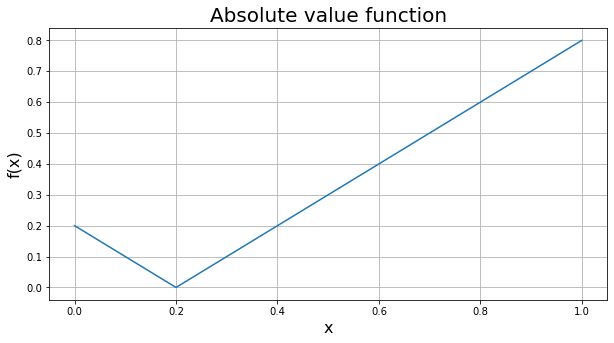

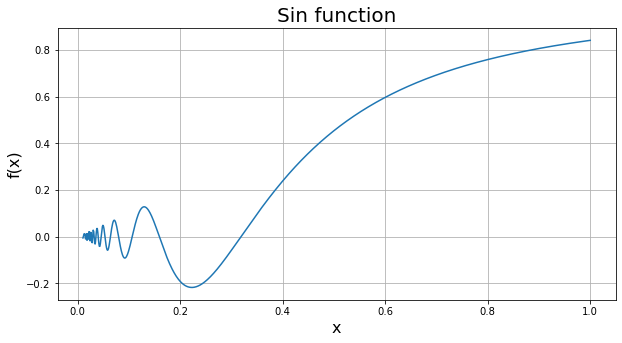

In [5]:
plot(cubic_range, cubic_function(cubic_range), 'Cubic function')
plot(abs_range, abs_function(abs_range), 'Absolute value function')
plot(sin_range, sin_function(sin_range), 'Sin function')

In [6]:
def exhaustive_search(func, func_range):
    num_of_iter = 0
    num_of_f_culc = 0
    x_min = func_range[0]
    func_min = func(x_min)
    
    for x in func_range:
        num_of_iter += 1
        if func(x) < func_min:
            func_min = func(x)
            x_min = x 
        num_of_f_culc +=1
    
    return x_min, func_min, num_of_iter, num_of_f_culc

In [7]:
def dichotomy_search(func, func_range):
    num_of_iter = 0
    num_of_f_culc = 0
    e = 0.001
    delta = e / 2
    a_0 = func_range[0]
    b_0 = func_range[-1]
    
    while b_0 - a_0 >= e:
        num_of_iter += 1
        x_1 = (a_0 + b_0 - delta) / 2
        x_2 = (a_0 + b_0 + delta) / 2
        
        if func(x_1) <= func(x_2):
            b_0 = x_2
        else:
            a_0 = x_1
            
        num_of_f_culc += 2
    
    x_min = np.around((a_0+b_0)/2, decimals=3)
    func_min = func(x_min)
    num_of_f_culc += 1
    
    return x_min, func_min, num_of_iter, num_of_f_culc

In [8]:
def golden_section_search(func, func_range):
    num_of_iter = 0
    num_of_f_culc = 0
    e = 0.001
    a_0 = func_range[0]
    b_0 = func_range[-1]
    
    x_lower = a_0 + (3 - np.sqrt(5)) / 2 * (b_0 - a_0) 
    x_higher = b_0 + (np.sqrt(5) - 3) / 2 * (b_0 - a_0)
    func_lower = func(x_lower)
    func_higher = func(x_higher)
    num_of_f_culc += 2
    
    while b_0 - a_0 >= e:
        num_of_iter += 1
        if func_lower <= func_higher:
            b_0 = x_higher
            x_higher = x_lower
            x_lower = a_0 + (3 - np.sqrt(5)) / 2 * (b_0 - a_0)
            func_higher = func_lower
            func_lower = func(x_lower)
            num_of_f_culc += 1
        else:
            a_0 = x_lower
            x_lower = x_higher
            x_higher = b_0 + (np.sqrt(5) - 3) / 2 * (b_0 - a_0)
            func_lower = func_higher
            func_higher = func(x_higher)
            num_of_f_culc += 1
        
        
    x_min = np.around((a_0 + b_0) / 2, decimals=3)
    func_min = func(x_min)
    num_of_f_culc += 1
    
    return x_min, func_min, num_of_iter, num_of_f_culc

### Visualization of results

In [9]:
def plot(x, y, dot_x, dot_y, label):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y)
    plt.scatter(dot_x, dot_y, s=25, c='red')
    plt.title(label, fontsize=20)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('f(x)', fontsize=16)
    plt.grid()
    plt.savefig(f'{label+"1"}.png', dpi=300)

In [10]:
cubic = pd.DataFrame(columns=['function_name', 'algoritm_name', 'x_min', 'f(x_min)', 'num_of_iterations', 'num_of_f(x)_calculations'])
absolute = pd.DataFrame(columns=['function_name', 'algoritm_name', 'x_min', 'f(x_min)', 'num_of_iterations', 'num_of_f(x)_calculations'])
sin = pd.DataFrame(columns=['function_name', 'algoritm_name', 'x_min', 'f(x_min)', 'num_of_iterations', 'num_of_f(x)_calculations'])

#### Cubic function

,function_name,algoritm_name,x_min,f(x_min),num_of_iterations,num_of_f(x)_calculations
0,Cubic,Exhaustive search,0.0,0.0,1001,1001
1,Cubic,Dichotomy search,0.0,0.0,11,23
2,Cubic,Golden section search,0.0,0.0,15,18


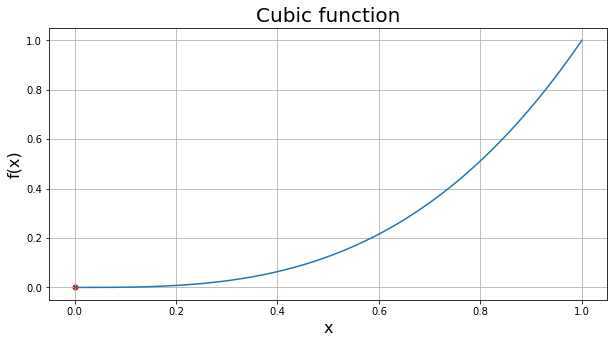

In [11]:
cubic_x_min_exh, cubic_func_min_exh, cubic_iter_exh, cubic_num_of_f_culc_exh = exhaustive_search(cubic_function, cubic_range)
cubic_x_min_dichot, cubic_func_min_dichot, cubic_iter_dichot, cubic_num_of_f_culc_dichot = dichotomy_search(cubic_function, cubic_range)
cubic_x_min_golden, cubic_func_min_golden, cubic_iter_golden, cubic_num_of_f_culc_golden = golden_section_search(cubic_function, cubic_range)

cubic = cubic.append({'function_name' : 'Cubic', 'algoritm_name': 'Exhaustive search',
                      'x_min': cubic_x_min_exh, 'f(x_min)': cubic_func_min_exh,
                      'num_of_iterations': cubic_iter_exh, 'num_of_f(x)_calculations': cubic_num_of_f_culc_exh},
                     ignore_index=True)

cubic = cubic.append({'function_name' : 'Cubic', 'algoritm_name': 'Dichotomy search',
                      'x_min': cubic_x_min_dichot, 'f(x_min)': cubic_func_min_dichot,
                      'num_of_iterations': cubic_iter_dichot, 'num_of_f(x)_calculations': cubic_num_of_f_culc_dichot}, 
                     ignore_index=True)

cubic = cubic.append({'function_name' : 'Cubic', 'algoritm_name': 'Golden section search',
                      'x_min': cubic_x_min_golden, 'f(x_min)': cubic_func_min_golden,
                      'num_of_iterations': cubic_iter_golden, 'num_of_f(x)_calculations': cubic_num_of_f_culc_golden}, 
                     ignore_index=True)

plot(cubic_range, cubic_function(cubic_range), cubic_x_min_exh, cubic_func_min_exh, 'Cubic function')

cubic

#### Absolute value function

,function_name,algoritm_name,x_min,f(x_min),num_of_iterations,num_of_f(x)_calculations
0,Absolute,Exhaustive search,0.2,0.0,1001,1001
1,Absolute,Dichotomy search,0.2,0.0,11,23
2,Absolute,Golden section search,0.2,0.0,15,18


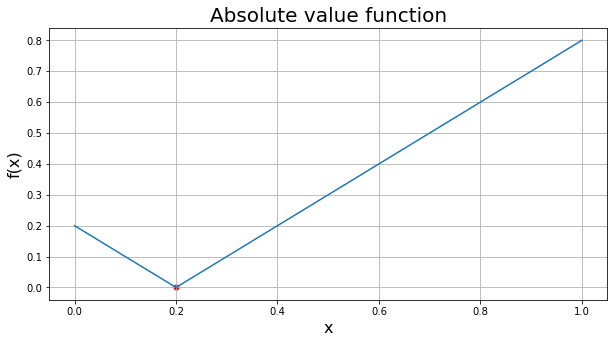

In [12]:
abs_x_min_exh, abs_func_min_exh, abs_iter_exh, abs_num_of_f_culc_exh = exhaustive_search(abs_function, abs_range)
abs_x_min_dichot, abs_func_min_dichot, abs_iter_dichot, abs_num_of_f_culc_dichot = dichotomy_search(abs_function, abs_range)
abs_x_min_golden, abs_func_min_golden, abs_iter_golden, abs_num_of_f_culc_golden = golden_section_search(abs_function, abs_range)

absolute = absolute.append({'function_name' : 'Absolute', 'algoritm_name': 'Exhaustive search',
                      'x_min': abs_x_min_exh, 'f(x_min)': abs_func_min_exh,
                      'num_of_iterations': abs_iter_exh, 'num_of_f(x)_calculations': abs_num_of_f_culc_exh},
                     ignore_index=True)

absolute = absolute.append({'function_name' : 'Absolute', 'algoritm_name': 'Dichotomy search',
                      'x_min': abs_x_min_dichot, 'f(x_min)': abs_func_min_dichot,
                      'num_of_iterations': abs_iter_dichot, 'num_of_f(x)_calculations': abs_num_of_f_culc_dichot},
                     ignore_index=True)

absolute = absolute.append({'function_name' : 'Absolute', 'algoritm_name': 'Golden section search',
                      'x_min': abs_x_min_golden, 'f(x_min)': abs_func_min_golden,
                      'num_of_iterations': abs_iter_golden, 'num_of_f(x)_calculations': abs_num_of_f_culc_golden},
                     ignore_index=True)

plot(abs_range, abs_function(abs_range), abs_x_min_exh, abs_func_min_exh, 'Absolute value function')

absolute

#### Sin function

,function_name,algoritm_name,x_min,f(x_min),num_of_iterations,num_of_f(x)_calculations
0,Sin,Exhaustive search,0.223,-0.217225,991,991
1,Sin,Dichotomy search,0.223,-0.217225,11,23
2,Sin,Golden section search,0.223,-0.217225,15,18


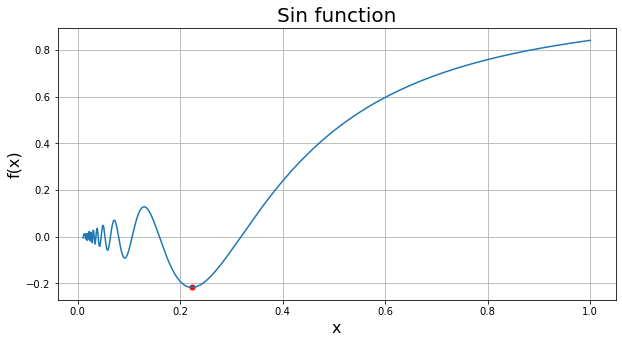

In [13]:
sin_x_min_exh, sin_func_min_exh, sin_iter_exh, sin_num_of_f_culc_exh = exhaustive_search(sin_function, sin_range)
sin_x_min_dichot, sin_func_min_dichot, sin_iter_dichot, sin_num_of_f_culc_dichot = dichotomy_search(sin_function, sin_range)
sin_x_min_golden, sin_func_min_golden, sin_iter_golden, sin_num_of_f_culc_golden = golden_section_search(sin_function, sin_range)

sin = sin.append({'function_name' : 'Sin', 'algoritm_name': 'Exhaustive search',
                      'x_min': sin_x_min_exh, 'f(x_min)': sin_func_min_exh,
                      'num_of_iterations': sin_iter_exh, 'num_of_f(x)_calculations': sin_num_of_f_culc_exh},
                     ignore_index=True)

sin = sin.append({'function_name' : 'Sin', 'algoritm_name': 'Dichotomy search',
                      'x_min': sin_x_min_dichot, 'f(x_min)': sin_func_min_dichot,
                      'num_of_iterations': sin_iter_dichot, 'num_of_f(x)_calculations': sin_num_of_f_culc_dichot},
                     ignore_index=True)

sin = sin.append({'function_name' : 'Sin', 'algoritm_name': 'Golden section search',
                      'x_min': sin_x_min_golden, 'f(x_min)': sin_func_min_golden,
                      'num_of_iterations': sin_iter_golden, 'num_of_f(x)_calculations': sin_num_of_f_culc_golden},
                     ignore_index=True)

plot(sin_range, sin_function(sin_range), sin_x_min_exh, sin_func_min_exh, 'Sin function')

sin

## Generate random numbers 𝛼 ∈ (0,1) and 𝛽 ∈ (0,1). Furthermore, generate the noisy data, according to the specific rule. Approximate the data by the following linear and rational functions.

In [14]:
alpha, beta = np.random.random(), np.random.random()
noise = np.random.normal(0, 1, 100)
epsilon = 0.001

x_k = np.arange(0, 1, 0.01)
y_k = [alpha * x_k[k] + beta + noise[k] for k in range(len(x_k))]

In [15]:
def lin_func(x, a, b):
    return a * x + b

def rational_func(x, a, b):
    return a / (1 + b * x)

In [16]:
def mse_func(x, func):
    sum = 0
    for i in range(100):
        sum += (func(x_k[i], x[0], x[1]) - y_k[i]) ** 2
    
    return sum

In [17]:
def exhaustive_search(func, approx_func):
    return scipy.optimize.brute(func, ranges=(slice(0,1,e), (slice(0,1,e))), args=(approx_func,))

def gauss_search(func, approx_func):
    return scipy.optimize.minimize(func, x0=(0,0), method='CG', args=(approx_func))

def neldermead_search(func, approx_func):
    return scipy.optimize.minimize(func, x0=(0,0), method='Nelder-Mead', args=(approx_func))

### Visualization of results

#### Linear approximant

In [18]:
exhaustive_results_lin = exhaustive_search(mse_func, lin_func)
gauss_results_lin = gauss_search(mse_func, lin_func).x
neldermead_results_lin = neldermead_search(mse_func, lin_func).x

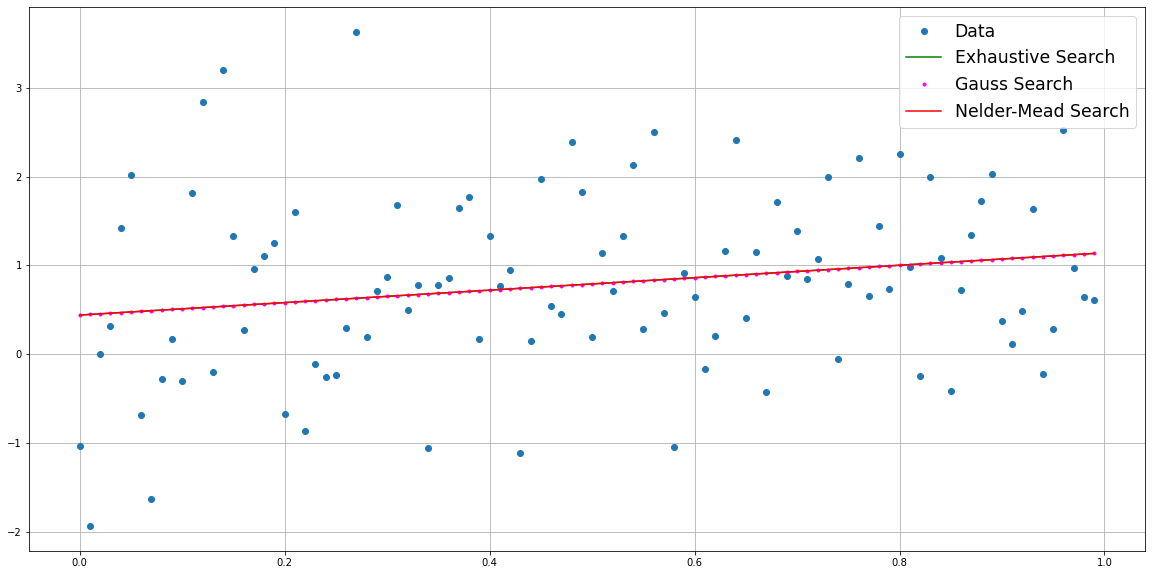

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, 'o', label='Data')
plt.grid()

y = [lin_func(x, exhaustive_results_lin[0], exhaustive_results_lin[1]) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search', color='g')

y = [lin_func(x, gauss_results_lin[0], gauss_results_lin[1]) for x in x_k]
plt.plot(x_k, y, '.', label='Gauss Search', color='magenta')

y = [lin_func(x, neldermead_results_lin[0], neldermead_results_lin[1]) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search', color='r')

plt.legend(fontsize='xx-large')
plt.savefig('linear_result.png', dpi=300)

#### Rational approximant

In [21]:
exhaustive_results_rat = exhaustive_search(mse_func, rational_func)
gauss_results_rat = gauss_search(mse_func, rational_func).x
neldermead_results_rat = neldermead_search(mse_func, rational_func).x

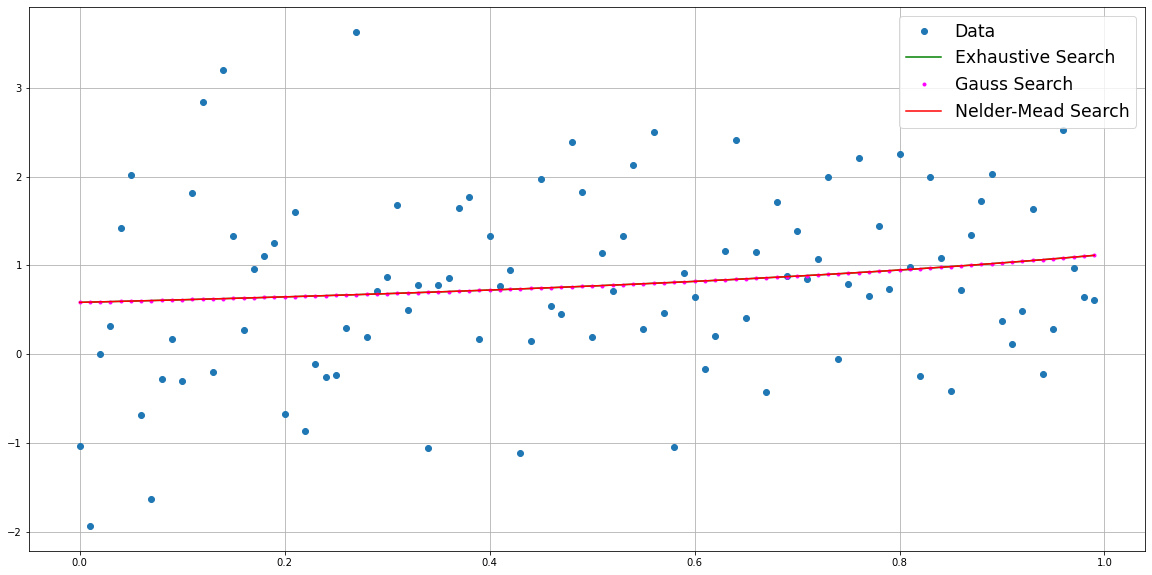

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(x_k, y_k, 'o', label='Data')
plt.grid()

y = [rational_func(x, exhaustive_results_rat[0], exhaustive_results_rat[1]) for x in x_k]
plt.plot(x_k, y, label='Exhaustive Search', color='g')

y = [rational_func(x, gauss_results_rat[0], gauss_results_rat[1]) for x in x_k]
plt.plot(x_k, y, '.', label='Gauss Search', color='magenta')

y = [rational_func(x, neldermead_results_rat[0], neldermead_results_rat[1]) for x in x_k]
plt.plot(x_k, y, label='Nelder-Mead Search', color='r')

plt.legend(fontsize='xx-large')
plt.savefig('rational_result.png', dpi=300)